# Notebook to examine preliminary stim data trials

## Imports

In [22]:
import os 
import glob
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import signal

from mosquito.process_abf import my_load_abf, detect_spikes, filter_emg

## Params

In [23]:
# plot params
plt.style.use('dark_background')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels

## Load data

In [24]:
# path to data file
data_path = '/media/sam/SamData/Mosquitoes/stim_testing/2024_07_11_0007'
data_fn = '2024_07_11_0007.abf'
data_path_full = os.path.join(data_path, data_fn)

data = my_load_abf(data_path_full)

In [33]:
# read out some data
t = data['time']
emg = data['emg']
fs = data['sampling_freq']

# # restrict attention to first part of data file first
# tmin = 0
# tmax = 90
# mask = (t >= tmin) & (t <= tmax)
# t = t[mask]
# emg = emg[mask]

## First pass visualization

Text(0, 0.5, 'emg (V)')

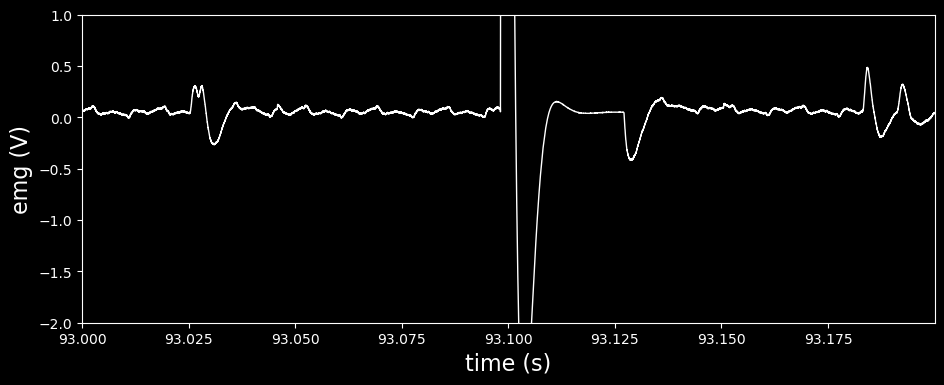

In [45]:
# plot emg vs time
fig, ax = plt.subplots(figsize=(11, 4))

tmin = 93 # 5
tmax = 93.2 # 6
mask = (t >= tmin) & (t <= tmax)

ax.plot(t[mask], emg[mask], 'w-', lw=1)
ax.set_ylim([-2, 1])
ax.autoscale(enable=True, axis='x', tight=True)

ax.set_xlabel('time (s)')
ax.set_ylabel('emg (V)')

# fig.savefig('example_trace.png')

## Use spike detection to try to pull out stim events

In [36]:
# # first need to filter data?
# emg_filt = filter_emg(emg, fs, lowcut=

/home/sam/Documents/code/mosquito/src/mosquito/process_abf.py:614: RuntimeWarning: divide by zero encountered in divide
  pseudo_z = (spike_max - spike_max_median) / spike_max_mad


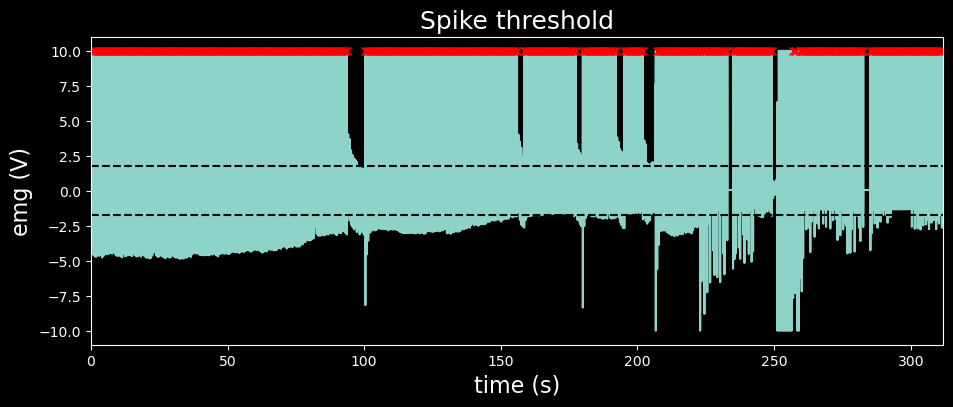

In [37]:
# try spike detection
spikes, spike_t, spike_idx = detect_spikes(emg, fs, thresh_factors=(20, 1000), window=1024, viz_flag=True)


Text(0.5, 1.0, 'stim events')

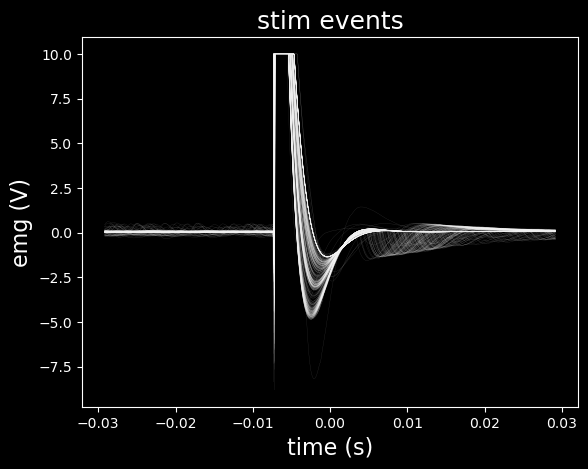

In [38]:
# visualize spikes
fig, ax = plt.subplots()

for spike in spikes:
    ax.plot(spike_t, spike, 'w-', lw=0.2, alpha=0.2)

ax.set_xlabel('time (s)')
ax.set_ylabel('emg (V)')
ax.set_title('stim events')

# fig.savefig('stim_events.png')

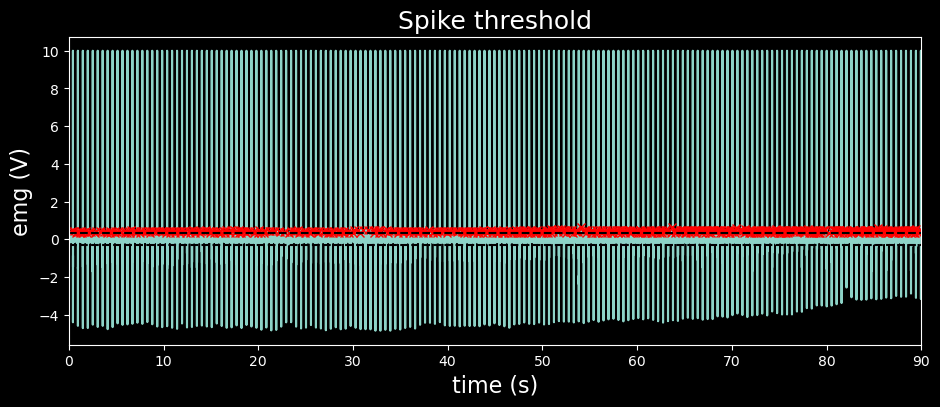

In [30]:
# can we also get real spikes to compare?
spikes_real, spike_t_real, spike_idx_real = detect_spikes(emg, fs, window=1024,  viz_flag=True)


Text(0.5, 1.0, 'spontaneous spikes')

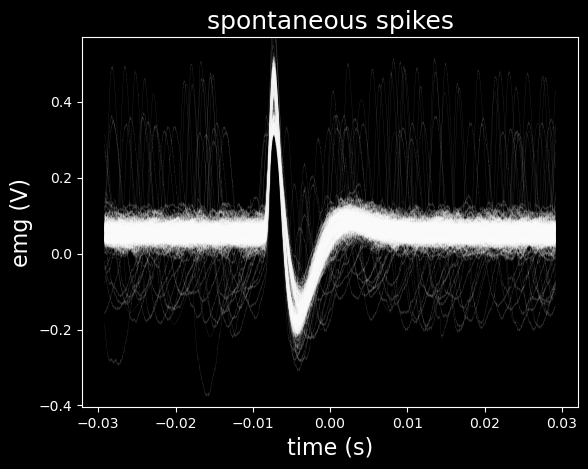

In [31]:
# visualize spikes
fig, ax = plt.subplots()

spike_array = np.vstack(spikes_real)
# subtract off initial value
spike_array -= np.reshape(np.mean(spike_array[:, :1024], axis=1), (-1, 1))
spike_mean = np.mean(spike_array, axis=0)

for spike in spikes_real:
    ax.plot(spike_t, spike, 'w-', lw=0.2, alpha=0.2)


ax.set_ylim([np.min(spike_mean) - 0.2, np.max(spike_mean) + 0.2])
ax.set_xlabel('time (s)')
ax.set_ylabel('emg (V)')
ax.set_title('spontaneous spikes')

# fig.savefig('spont_events.png')

## Scratch